In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
dfx=pd.read_csv("xdata.csv")
dfy=pd.read_csv("ydata.csv")


/tmp/ipykernel_4994/2073980929.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]


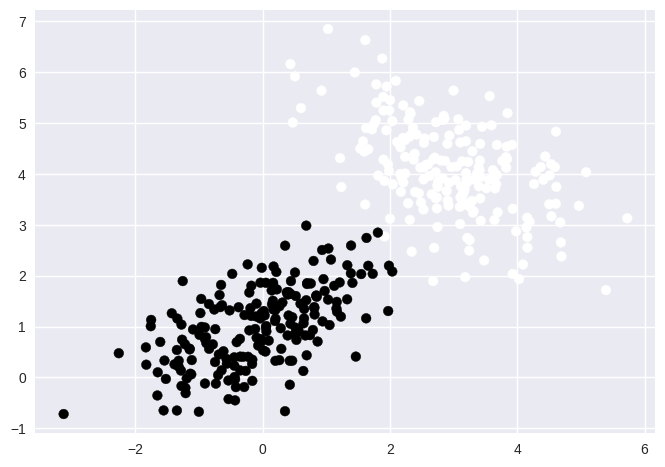

In [4]:
X=dfx.values
Y=dfy.values
print(X)
X=X[:,1:]
Y=Y[:,1:].reshape((-1,))

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

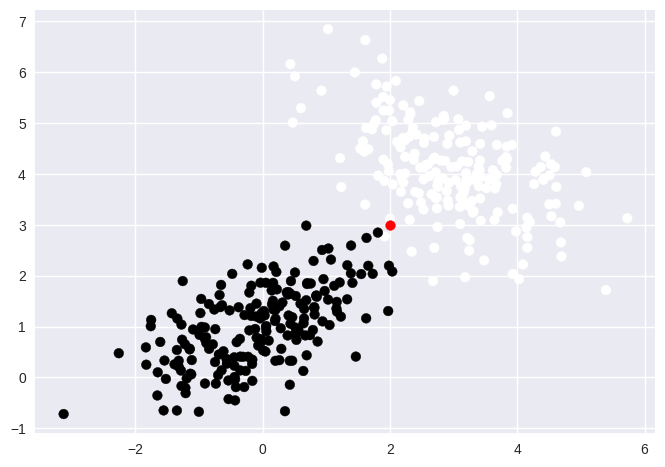

In [5]:
query_x=np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
# The c=Y argument specifies the color of each point 
# in the scatter plot based on the corresponding 
# target class label stored in the one-dimensional 
# numpy array Y.
plt.scatter(query_x[0],query_x[1],color='red')

In [ ]:
#find the distance from red point to all the closest k points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]

    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append(d,Y[i])
    vals=sorted(vals)
    #Nearest First K points
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index ]
    return pred

vals=knn(X,Y,query_x)
np.unique(vals)